# Wildfire detection

## Convolutional Neural Network

### Data pre-processing

In [ ]:
import os, cv2
path = "/content/drive/MyDrive/forest_fire/training"

In [ ]:
file_o = os.listdir(path+"/fire")

for fil in file_o:
    a = cv2.imread(path+"/fire/"+fil)
    resized = cv2.resize(a, (256,256))
    cv2.imwrite(path+"/data/"+"fire."+fil, resized)

In [ ]:
file_o = os.listdir(path+"/nofire")

for fil in file_o:
    a = cv2.imread(path+"/nofire/"+fil)
    resized = cv2.resize(a, (256,256))
    cv2.imwrite(path+"/data/"+"nofire."+fil, resized)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir(path+"/data")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'fire':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,fire.fire_0324.jpg,1
1,fire.fire_0329.jpg,1
2,fire.fire_0323.jpg,1
3,fire.fire_0369.jpg,1
4,fire.fire_0376.jpg,1


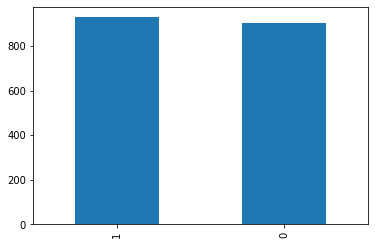

In [ ]:
df['category'].value_counts().plot.bar()

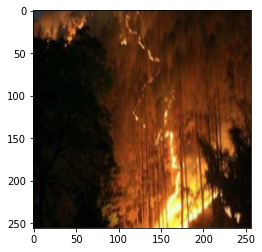

In [ ]:
sample = random.choice(filenames)
image = load_img(path+"/data/"+sample)
plt.imshow(image)

In [ ]:
df["category"] = df["category"].replace({0: 'nofire', 1: 'fire'})

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path+"/data", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=100
)

Found 1465 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    path+"/data", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=100
)

Found 367 validated image filenames belonging to 2 classes.


## Building CNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=100

In [ ]:
history = model.fit_generator(
    train_generator, 
    epochs=150,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/150
14/14 [==============================] - 24s 2s/step - loss: 0.0552 - accuracy: 0.9782 - val_loss: 1.3805 - val_accuracy: 0.6333
Epoch 2/150
14/14 [==============================] - 24s 2s/step - loss: 0.0436 - accuracy: 0.9850 - val_loss: 0.8197 - val_accuracy: 0.7167
Epoch 3/150
14/14 [==============================] - 22s 2s/step - loss: 0.0495 - accuracy: 0.9865 - val_loss: 1.1543 - val_accuracy: 0.6600
Epoch 4/150
14/14 [==============================] - 29s 2s/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.6843 - val_accuracy: 0.7800
Epoch 5/150
14/14 [==============================] - 23s 2s/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 1.0529 - val_accuracy: 0.7133
Epoch 6/150
14/14 [==============================] - 23s 2s/step - loss: 0.0413 - accuracy: 0.9872 - val_loss: 0.3661 - val_accuracy: 0.8667
Epoch 7/150
14/14 [==============================] - 24s 2s/step - loss: 0.0529 - accuracy: 0.9827 - val_loss: 0.7474 - val_accuracy: 0.7700
Epoch 8/150
1

In [ ]:
model.save_weights(path+"model.h5")

In [ ]:
path = "/content/drive/MyDrive/forest_fire/testing"

file_o = os.listdir(path+"/fire")

for fil in file_o:
    a = cv2.imread(path+"/fire/"+fil)
    resized = cv2.resize(a, (256,256))
    cv2.imwrite(path+"/data/"+"fire."+fil, resized)

In [ ]:
file_o = os.listdir(path+"/nofire")

for fil in file_o:
    a = cv2.imread(path+"/nofire/"+fil)
    resized = cv2.resize(a, (256,256))
    cv2.imwrite(path+"/data/"+"nofire."+fil, resized)

In [ ]:
filenames = os.listdir(path+"/data")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'fire':
        categories.append(1)
    else:
        categories.append(0)

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    path+"/data", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(256,256),
    batch_size=batch_size,
    shuffle=False
)

Found 68 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
test_df['predict'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['predict'] = test_df['predict'].replace(label_map)

In [ ]:
test_df['predict'] = test_df['predict'].replace({ 'fire': 1, 'nofire': 0 })

In [ ]:
test_df.head()

,filename,category,predict
0,fire.abc175.jpg,1,1
1,fire.abc172.jpg,1,1
2,fire.abc173.jpg,1,1
3,fire.abc169.jpg,1,1
4,fire.abc171.jpg,1,1


In [ ]:
y_true = test_df['category'].values
y_pred = test_df['predict'].values

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.953529411647058


# Inception - GoogleNet

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Dense
from keras.layers.merge import concatenate

In [ ]:
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    # 1x1 conv
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    
    # 3x3 conv
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    
    # 5x5 conv
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    
    # 3x3 max pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    
    dense = Dense(2, activation='softmax')(pool)
    layer_out = concatenate([conv1, conv3, conv5, pool, dense], axis=-1)
    
    return layer_out
 

visible = Input(shape=(256, 256, 3))

layer = inception_module(visible, 64, 96, 128, 16, 32, 32)

layer = inception_module(layer, 128, 128, 192, 32, 96, 64)

model = Model(inputs=visible, outputs=layer)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 256, 256, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv2d_25 (Conv2D)             (None, 256, 256, 96  384         ['input_3[0][0]']                
                                )                                                                 
                                                                                            

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator, 
    epochs=15,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  
Epoch 1/150
14/14 [==============================] - 24s 2s/step - loss: 0.0552 - accuracy: 0.9782 - val_loss: 1.3805 - val_accuracy: 0.6333
Epoch 2/150
14/14 [==============================] - 24s 2s/step - loss: 0.0436 - accuracy: 0.9850 - val_loss: 0.8197 - val_accuracy: 0.7167
Epoch 3/150
14/14 [==============================] - 22s 2s/step - loss: 0.0495 - accuracy: 0.9865 - val_loss: 1.1543 - val_accuracy: 0.6600
Epoch 4/150
14/14 [==============================] - 29s 2s/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.6843 - val_accuracy: 0.7800
Epoch 5/150
14/14 [==============================] - 23s 2s/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 1.0529 - val_accuracy: 0.7133
Epoch 6/150
14/14 [==============================] - 23s 2s/step - loss: 0.0413 - accur

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
test_df['predict'] = test_df['predict'].replace({ 'fire': 1, 'nofire': 0 })
test_df.head()

,filename,category,predict
0,fire.abc175.jpg,1,1
1,fire.abc172.jpg,1,1
2,fire.abc173.jpg,1,1
3,fire.abc169.jpg,1,1
4,fire.abc171.jpg,1,1


In [ ]:
y_true = test_df['category'].values
y_pred = test_df['predict'].values

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.97699413547085
